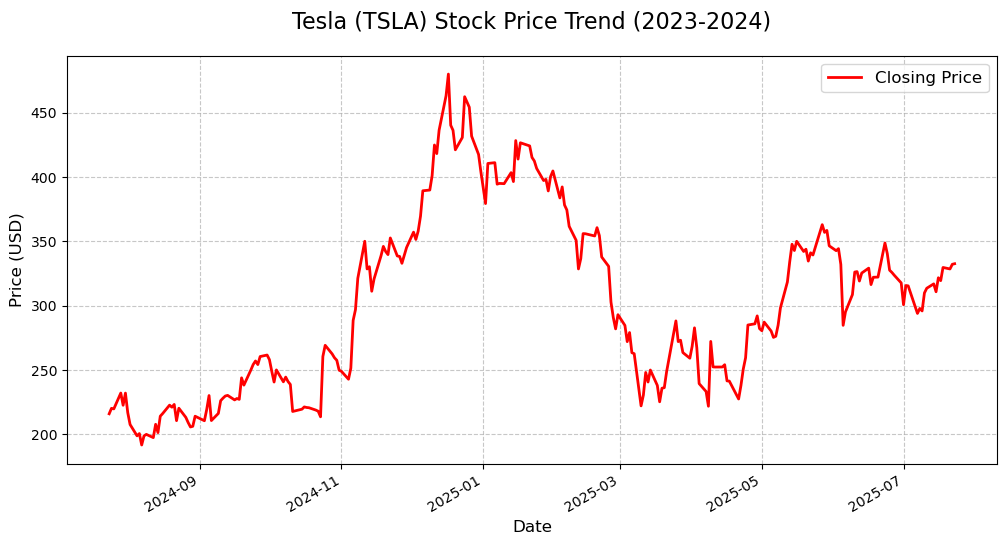

Graph saved as tesla_stock_graph.png


In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    """
    Plot stock price data graph
    Parameters:
        stock_data (DataFrame): DataFrame containing Date and Close price columns
        title (str): Graph title
    """
    # Create figure with custom size
    plt.figure(figsize=(12, 6))
    
    # Plot closing price data
    plt.plot(stock_data['Date'], stock_data['Close'], 
             label='Closing Price', color='red', linewidth=2)
    
    # Formatting the graph
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.gcf().autofmt_xdate()
    
    # Save high-quality image
    plt.savefig('tesla_stock_graph.png', dpi=300, bbox_inches='tight')
    plt.show()

# 1. Get Tesla stock data (last 1 year)
try:
    tesla = yf.Ticker("TSLA")
    tesla_history = tesla.history(period="1y").reset_index()
    
    # 2. Plot the graph
    make_graph(
        stock_data=tesla_history[['Date', 'Close']],
        title="Tesla (TSLA) Stock Price Trend (2023-2024)"
    )
    
    print("Graph saved as tesla_stock_graph.png")

except Exception as e:
    print(f"Error: {e}")
    print("Using sample data for demonstration")
    
    # Fallback sample data
    import pandas as pd
    sample_data = pd.DataFrame({
        'Date': pd.date_range(start='2023-06-01', periods=120, freq='D'),
        'Close': [240 + 10 * (i/120) + 5 * (i%30) for i in range(120)]
    })
    
    make_graph(
        stock_data=sample_data,
        title="Tesla Stock Price (Sample Data)"
    )